# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [4]:
# your code here

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'X train shape: {x_train.shape}, and X test shape: {x_test.shape}')
print(f'Y train shape: {y_train.shape}, and Y test shape: {y_test.shape}')
print(f'X train original range min ({x_train.min()}) and max ({x_train.max()})')

x_train, x_test = x_train / 255.0, x_test / 255.0

print(f'X train new range min ({x_train.min()}) and max ({x_train.max()})')

X train shape: (60000, 28, 28), and X test shape: (10000, 28, 28)
Y train shape: (60000,), and Y test shape: (10000,)
X train original range min (0) and max (255)
X train new range min (0.0) and max (1.0)


**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


<function matplotlib.pyplot.show(*args, **kw)>

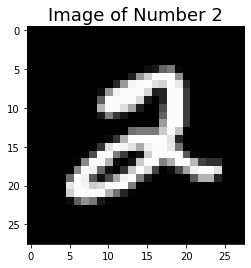

In [5]:
# your code here

i = 5

plt.imshow(x_train[i], cmap='gray')
plt.title(f'Image of Number {y_train[i]}', size=18)
plt.show

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [6]:
# your code here

n_samples, h, w = x_train.shape
n_pixels = h * w
pca_x_train = x_train.reshape(n_samples, n_pixels)

n_samples, h, w = x_test.shape
n_pixels = h * w
pca_x_test = x_test.reshape(n_samples, n_pixels)
print(f'PCA X train shape: {pca_x_train.shape}, and PCA X test shape: {pca_x_test.shape}')

n_comp = 2

pca_transformer = PCA(n_components=n_comp).fit(pca_x_train)
pca_latent_train = pca_transformer.transform(pca_x_train)
pca_latent_test = pca_transformer.transform(pca_x_test)
print(pca_latent_train[0])

PCA X train shape: (60000, 784), and PCA X test shape: (10000, 784)
[ 0.48601201 -1.22624144]


**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


Text(0, 0.5, 'PCA Dimention 2')

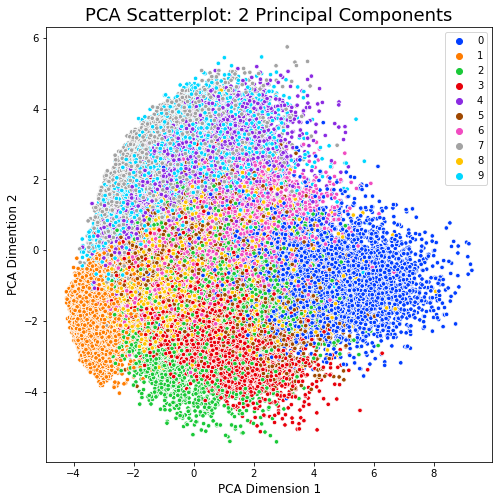

In [7]:
# your code here

kwargs={"s": 20}

fig = plt.figure(figsize=(8,8))
sns.scatterplot(pca_latent_train[:,0], pca_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                **kwargs)
plt.title('PCA Scatterplot: 2 Principal Components', size=18)
plt.xlabel("PCA Dimension 1", size=12)
plt.ylabel("PCA Dimention 2", size=12)

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [8]:
# your code here

n_samples, h, w = x_train.shape
n_pixels = h * w
encoding_dim = 2

encoder_input = Input(shape=(h * w))
encoded_latent_view = Dense(units=encoding_dim, activation='linear')(encoder_input)
linear_encoder  = Model(encoder_input, encoded_latent_view, name='linear_encoder')
linear_encoder.summary()

decoder_input = Input(shape=(encoding_dim,))
decoded_layer = Dense(units=n_pixels, activation='linear')(decoder_input)
linear_decoder = Model(decoder_input, decoded_layer, name='linear_decoder')
linear_decoder.summary()

lae = Sequential(name='lae')
lae.add(linear_encoder)
lae.add(linear_decoder)
lae.compile(loss='mse', optimizer=Adam(lr=0.0001))
lae.summary()

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________
Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               2352      
Total params: 2,352
Trainable params: 2,352
Non-trainable params: 0
_________________________________________________________________
Model: "lae"
___________

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [9]:
# your code here

batch_size = 5
epochs = 20

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being further defined as "for at least `patience` epochs
        patience=3,
        verbose=1,
        mode='auto'
    )
]

lae_history = lae.fit(pca_x_train, pca_x_train,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(pca_x_test, pca_x_test),
                      callbacks=callbacks)

lae.save_weights("../model/lae_weights.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 460us/sample - loss: 0.0619 - val_loss: 0.0576
Epoch 2/20
60000/60000 [==============================] - 26s 436us/sample - loss: 0.0574 - val_loss: 0.0570
Epoch 3/20
60000/60000 [==============================] - 26s 437us/sample - loss: 0.0569 - val_loss: 0.0565
Epoch 4/20
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0565 - val_loss: 0.0562
Epoch 5/20
60000/60000 [==============================] - 26s 440us/sample - loss: 0.0563 - val_loss: 0.0560
Epoch 6/20
60000/60000 [==============================] - 26s 437us/sample - loss: 0.0562 - val_loss: 0.0559
Epoch 7/20
60000/60000 [==============================] - 26s 438us/sample - loss: 0.0561 - val_loss: 0.0558
Epoch 8/20
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0560 - val_loss: 0.0557
Epoch 9/20
60000/60000 [==============================] - 26s 439us/sample - l

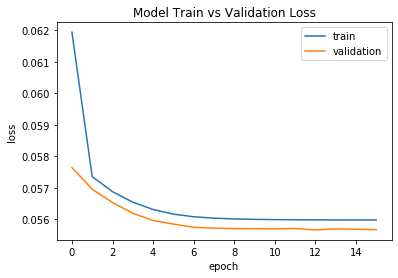

In [10]:
# your code here

plt.plot(lae_history.history['loss'])
plt.plot(lae_history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [11]:
# your code here

lae.load_weights("../model/lae_weights.h5")

lae_latent_train = linear_encoder.predict(pca_x_train)

Text(0, 0.5, 'LAE Feature 2')

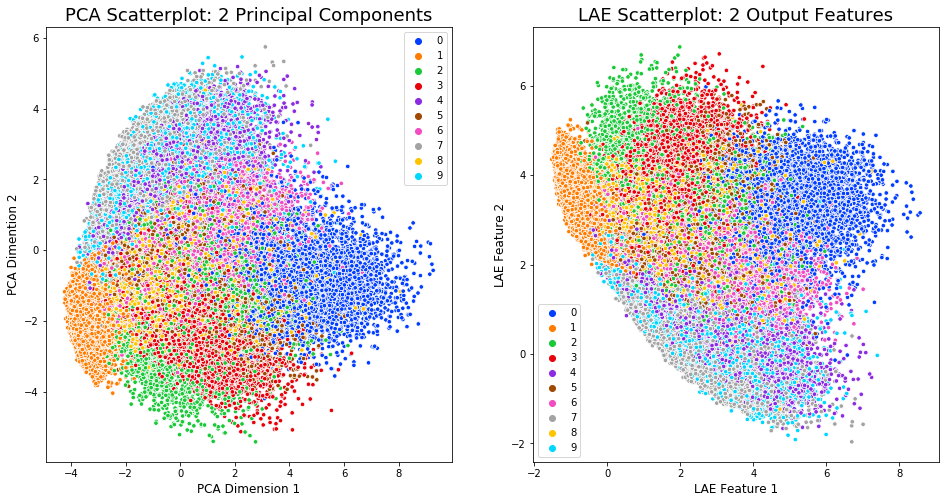

In [12]:
# your code here

kwargs={"s": 20}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
sns.scatterplot(pca_latent_train[:,0], pca_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                ax=ax1,
                **kwargs)
ax1.set_title('PCA Scatterplot: 2 Principal Components', size=18)
ax1.set_xlabel("PCA Dimension 1", size=12)
ax1.set_ylabel("PCA Dimention 2", size=12)

sns.scatterplot(lae_latent_train[:,0], lae_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                ax=ax2,
                **kwargs)
ax2.set_title('LAE Scatterplot: 2 Output Features', size=18)
ax2.set_xlabel("LAE Feature 1", size=12)
ax2.set_ylabel("LAE Feature 2", size=12)

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


*Your answer here*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [13]:
# your code here

n_samples, h, w = x_train.shape
n_pixels = h * w
encoding_dim = 2

encoder_input = Input(shape=(h * w))
encoder_layer = Dense(units=n_pixels, use_bias=True, activation='relu', name='encoder_Dense_1.1')(encoder_input)
encoder_layer = Dense(units=n_pixels/2, use_bias=True, activation='relu', name='encoder_Dense_1.2')(encoder_layer)
latent_view   = Dense(units=encoding_dim, use_bias=True, activation='relu', name='latent_view')(encoder_layer)
encoder_model = Model(encoder_input, latent_view, name='encoder_model')
encoder_model.summary()

decoder_input = Input(shape=(encoding_dim,))
decoder_layer = Dense(units=encoding_dim, use_bias=True, activation='relu', name='encoder_Dense_2.1')(decoder_input)
decoder_layer = Dense(units=n_pixels/2, use_bias=True, activation='sigmoid', name='encoder_Dense_2.2')(decoder_layer)
decoder_layer = Dense(units=n_pixels, use_bias=True, activation='sigmoid', name='encoder_Dense_2.3')(decoder_layer)
decoder_model = Model(decoder_input, decoder_layer, name='decoder_model')
decoder_model.summary()

ae = Sequential(name='ae')
ae.add(encoder_model)
ae.add(decoder_model)
ae.compile(loss='mse', optimizer=Adam(lr=0.0003))
ae.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
encoder_Dense_1.1 (Dense)    (None, 784)               615440    
_________________________________________________________________
encoder_Dense_1.2 (Dense)    (None, 392)               307720    
_________________________________________________________________
latent_view (Dense)          (None, 2)                 786       
Total params: 923,946
Trainable params: 923,946
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
________________________

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [14]:
# your code here

batch_size = 4
epochs = 40

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being further defined as "for at least `patience` epochs
        patience=3,
        verbose=1,
        mode='auto'
    )
]

ae_history = ae.fit(pca_x_train, pca_x_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(pca_x_test, pca_x_test),
                    callbacks=callbacks)

ae.save_weights("../model/ae_weights.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0515 - val_loss: 0.0464
Epoch 2/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0454 - val_loss: 0.0443
Epoch 3/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0437 - val_loss: 0.0432
Epoch 4/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0427 - val_loss: 0.0423
Epoch 5/40
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0419 - val_loss: 0.0417
Epoch 6/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0414 - val_loss: 0.0412
Epoch 7/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0407 - val_loss: 0.0408
Epoch 8/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0402 - val_loss: 0.0405
Epoch 9/40
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0399 - val_

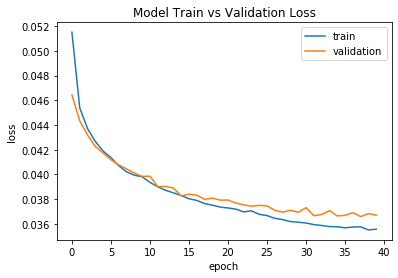

In [15]:
# your code here

plt.plot(ae_history.history['loss'])
plt.plot(ae_history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [16]:
# your code here

ae.load_weights("../model/ae_weights.h5")

ae_latent_train = encoder_model.predict(pca_x_train)
print(lae_latent_train.shape)
print(ae_latent_train.shape)

(60000, 2)
(60000, 2)


[None, None]

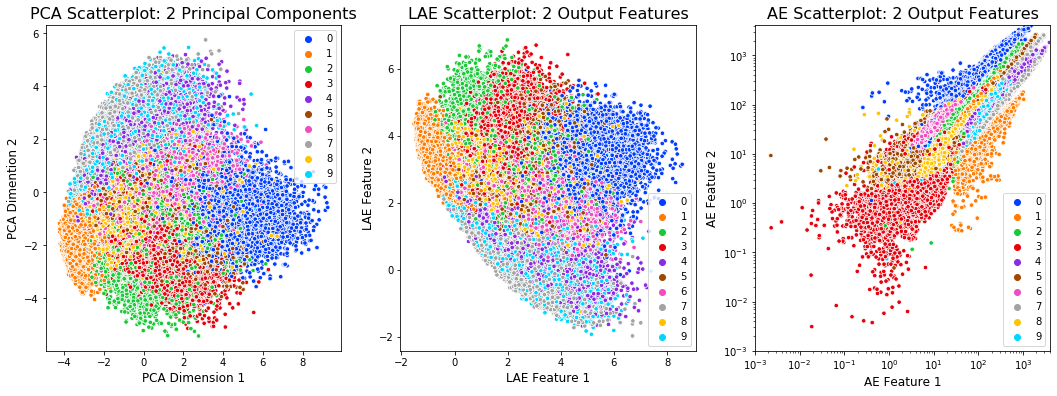

In [17]:
# your code here

kwargs={"s": 20}

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))
sns.scatterplot(pca_latent_train[:,0], pca_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                ax=ax1,
                **kwargs)
ax1.set_title('PCA Scatterplot: 2 Principal Components', size=16)
ax1.set_xlabel("PCA Dimension 1", size=12)
ax1.set_ylabel("PCA Dimention 2", size=12)

sns.scatterplot(lae_latent_train[:,0], lae_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                ax=ax2,
                **kwargs)
ax2.set_title('LAE Scatterplot: 2 Output Features', size=16)
ax2.set_xlabel("LAE Feature 1", size=12)
ax2.set_ylabel("LAE Feature 2", size=12)

sns.scatterplot(ae_latent_train[:,0], ae_latent_train[:,1],
                hue=y_train,
                palette=sns.color_palette('bright', 10),
                legend='full',
                ax=ax3,
                **kwargs)
ax3.set_title('AE Scatterplot: 2 Output Features', size=16)
ax3.set_xlabel("AE Feature 1", size=12)
ax3.set_ylabel("AE Feature 2", size=12)
ax3.set(xlim=(0.001, None), ylim=(0.001, None))
ax3.set(xscale="log", yscale="log")

*Your answer here*

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [18]:
# your code here

np.random.seed(109)

n = np.random.randint(0, len(x_test)-6)
m = n + 6
print(n, m)

pca_recons_x_test = pca_transformer.inverse_transform(pca_latent_test)
print(pca_recons_x_test.shape)
lae_recons_x_test = lae.predict(pca_x_test)
print(lae_recons_x_test.shape)
ae_recons_x_test = ae.predict(pca_x_test)
print(ae_recons_x_test.shape)

3317 3323
(10000, 784)
(10000, 784)
(10000, 784)


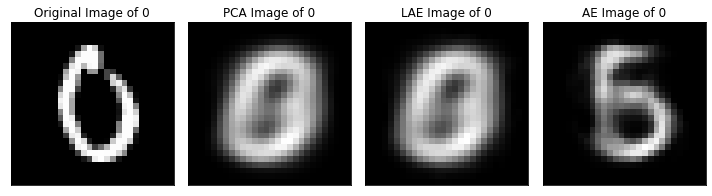

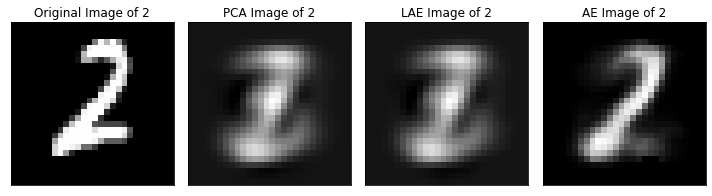

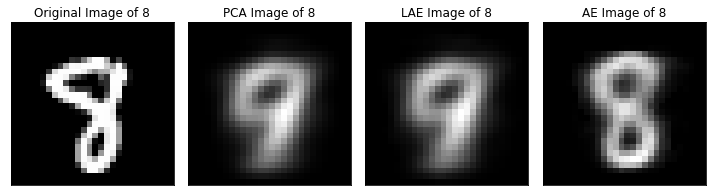

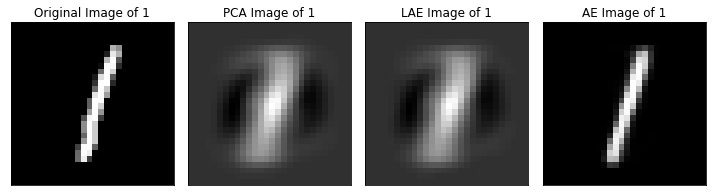

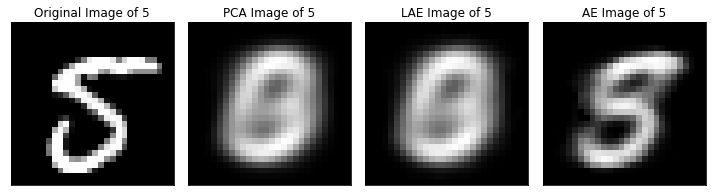

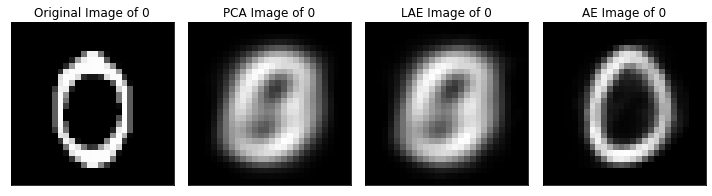

In [19]:
# your code here

for i, a in enumerate(range(n, m)):
    f, ax = plt.subplots(1, 4, subplot_kw={'xticks': [], 'yticks': []})
    f.set_size_inches(10, 10)
    
    ax[0].imshow(x_test[a], cmap='gray')
    ax[0].set_title(f'Original Image of {y_test[a]}', size=12)

    ax[1].imshow(pca_recons_x_test[a].reshape(28, 28), cmap='gray')
    ax[1].set_title(f'PCA Image of {y_test[a]}', size=12)

    ax[2].imshow(lae_recons_x_test[a].reshape(28, 28), cmap='gray')
    ax[2].set_title(f'LAE Image of {y_test[a]}', size=12)

    ax[3].imshow(ae_recons_x_test[a].reshape(28, 28), cmap='gray')
    ax[3].set_title(f'AE Image of {y_test[a]}', size=12)
    
    plt.tight_layout()
plt.show()

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [20]:
# your code here

print(f'PCA MSE: {mean_squared_error(pca_x_test, pca_recons_x_test)}')
print(f'LAE MSE: {mean_squared_error(pca_x_test, lae_recons_x_test)}')
print(f' AE MSE: {mean_squared_error(pca_x_test, ae_recons_x_test)}')

PCA MSE: 0.05566951403263659
LAE MSE: 0.05567423189125908
 AE MSE: 0.03670063072132028


*Your answer here*

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [21]:
# your code here

cs109b = np.genfromtxt('../data/cs109b-mnist-mix.csv', delimiter=",")
x_cs109b = cs109b.reshape(-1, 28, 28) / 255.0
print(x_cs109b.shape)

(3067, 28, 28)


<function matplotlib.pyplot.show(*args, **kw)>

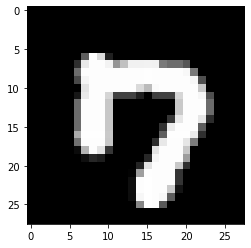

In [22]:
# your code here

np.random.seed(109)
i = np.random.randint(0, len(x_cs109b))

plt.imshow(x_cs109b[i], cmap='gray')
plt.show

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [23]:
# your code here

n, h, w = x_cs109b.shape

cae = Sequential(name='cae')
cae.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2D_1.1', input_shape=(h, w, 1)))
cae.add(MaxPooling2D(pool_size=(2, 2), padding='same', name='MaxPooling2D_1.1'))
cae.add(Conv2D(filters=14, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2D_1.2'))
cae.add(MaxPooling2D(pool_size=(2, 2), padding='same', name='MaxPooling2D_1.2'))
cae.add(Conv2D(filters=7, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2D_1.3'))
cae.add(MaxPooling2D(pool_size=(2, 2), padding='same', name='MaxPooling2D_1.3'))
cae.add(Dense(units=14, use_bias=True, activation='relu', name='Dense_1.1'))
cae.add(Conv2D(filters=7, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2D_2.1'))
cae.add(UpSampling2D(size=(2, 2), name='UpSampling2D_1.1'))
cae.add(Conv2D(filters=14, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2D_2.2'))
cae.add(UpSampling2D(size=(2, 2), name='UpSampling2D_1.2'))
cae.add(Conv2D(filters=28, kernel_size=(3, 3), activation='relu', name='Conv2D_2.3'))
cae.add(UpSampling2D(size=(2, 2), name='UpSampling2D_1.3'))
cae.add(Conv2D(filters=1, kernel_size=(1, 1), activation='sigmoid', name='Conv2D_2.4'))
cae.summary()

Model: "cae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1.1 (Conv2D)          (None, 28, 28, 28)        280       
_________________________________________________________________
MaxPooling2D_1.1 (MaxPooling (None, 14, 14, 28)        0         
_________________________________________________________________
Conv2D_1.2 (Conv2D)          (None, 14, 14, 14)        3542      
_________________________________________________________________
MaxPooling2D_1.2 (MaxPooling (None, 7, 7, 14)          0         
_________________________________________________________________
Conv2D_1.3 (Conv2D)          (None, 7, 7, 7)           889       
_________________________________________________________________
MaxPooling2D_1.3 (MaxPooling (None, 4, 4, 7)           0         
_________________________________________________________________
Dense_1.1 (Dense)            (None, 4, 4, 14)          112     

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [24]:
# your code here

batch_size = 5
epochs = 50

cae.compile(loss='mse', optimizer=Adam(lr=1/3/1000))

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being further defined as "for at least `patience` epochs
        patience=3,
        verbose=1,
        mode='auto'
    )
]

cae_history = cae.fit(x_train.reshape(-1, h, w, 1), x_train.reshape(-1, h, w, 1),
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test.reshape(-1, h, w, 1), x_test.reshape(-1, h, w, 1)),
                      callbacks=callbacks)

cae.save_weights("../model/cae_weights.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0317 - val_loss: 0.0252
Epoch 2/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0243 - val_loss: 0.0232
Epoch 3/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0230 - val_loss: 0.0224
Epoch 4/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0224 - val_loss: 0.0218
Epoch 5/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0220 - val_loss: 0.0215
Epoch 6/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0217 - val_loss: 0.0214
Epoch 7/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0214 - val_loss: 0.0211
Epoch 8/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0211 - val_loss: 0.0210
Epoch 9/50
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0209 - val_

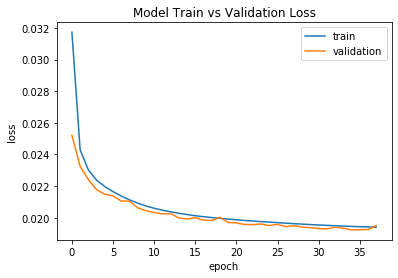

In [25]:
# your code here

plt.plot(cae_history.history['loss'])
plt.plot(cae_history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [26]:
# your code here

cae.load_weights("../model/cae_weights.h5")

cae_recons_x_test = cae.predict(x_test.reshape(-1, h, w, 1))
print(cae_recons_x_test.shape)

(10000, 28, 28, 1)


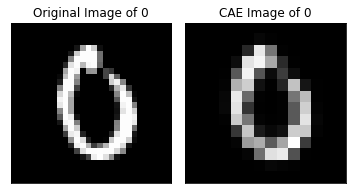

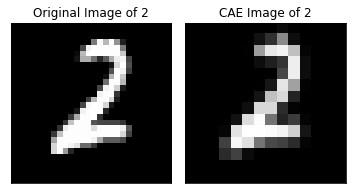

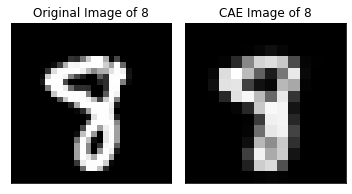

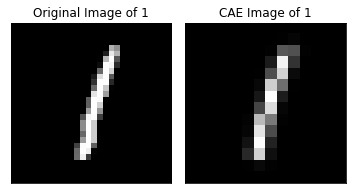

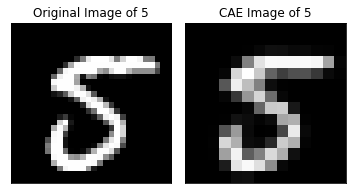

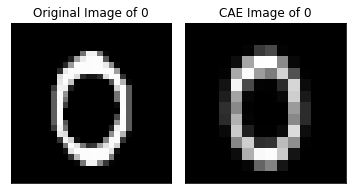

In [27]:
# your code here

np.random.seed(109)

n = np.random.randint(0, len(x_test)-6)
m = n + 6

for i, a in enumerate(range(n, m)):
    f, ax = plt.subplots(1, 2, subplot_kw={'xticks': [], 'yticks': []})
    f.set_size_inches(5, 5)
    
    ax[0].imshow(x_test[a], cmap='gray')
    ax[0].set_title(f'Original Image of {y_test[a]}', size=12)

    ax[1].imshow(cae_recons_x_test[a].reshape(28, 28), cmap='gray')
    ax[1].set_title(f'CAE Image of {y_test[a]}', size=12)
    
    plt.tight_layout()
plt.show()

*Your answer here*

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [28]:
# your code here

print(x_test.shape)
print(cae_recons_x_test.shape)

mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

mse_x_test = mse(x_test.reshape(-1), cae_recons_x_test.reshape(-1))
print('X Test MSE: ', mse_x_test.numpy())

mse_x_test = np.array([])
    
for i, a in enumerate(x_test):
    mse_i = mse(x_test[i].reshape(-1), cae_recons_x_test[i].reshape(-1))
    mse_x_test = np.append(mse_x_test, mse_i)

print(mse_x_test.shape)

(10000, 28, 28)
(10000, 28, 28, 1)
X Test MSE:  0.019504642
(10000,)


In [29]:
# your code here

cae_recons_x_cs109b = cae.predict(x_cs109b.reshape(-1, h, w, 1))
mse_x_cs109b = mse(x_cs109b.reshape(-1), cae_recons_x_cs109b.reshape(-1))
print('X CS109B MSE: ', mse_x_cs109b.numpy())

mse_x_cs109b = np.array([])
    
for i, a in enumerate(x_cs109b):
    mse_i = mse(x_cs109b[i].reshape(-1), cae_recons_x_test[i].reshape(-1))
    mse_x_cs109b = np.append(mse_x_cs109b, mse_i)

print(mse_x_cs109b.shape)

X CS109B MSE:  0.01936361
(3067,)


**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


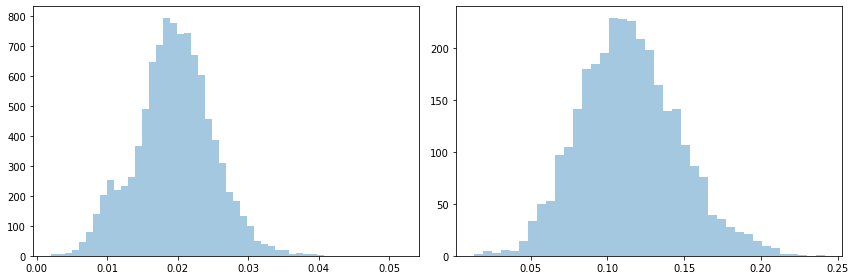

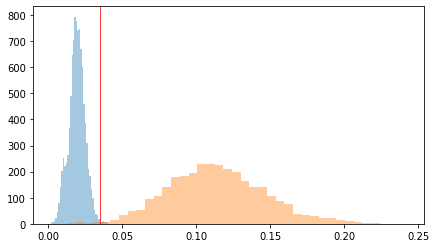

In [30]:
# your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(mse_x_test, kde = False, ax=ax1)
sns.distplot(mse_x_cs109b, kde = False, ax=ax2)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 4))
for a in [mse_x_test, mse_x_cs109b]:
    sns.distplot(a, kde=False, ax=ax)
    ax.axvline(0.035, c='r', lw=.5)

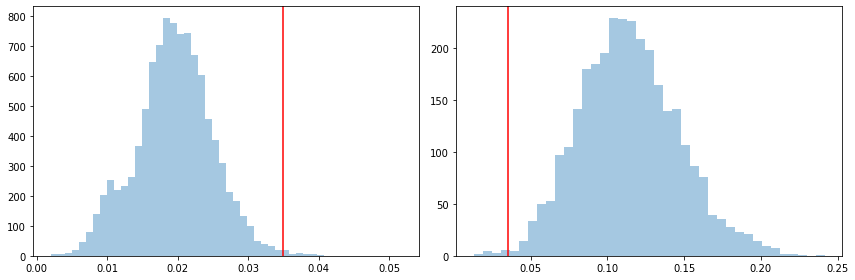

In [31]:
# your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(mse_x_test, kde = False, ax=ax1)
ax1.axvline(0.035, c='r')
sns.distplot(mse_x_cs109b, kde = False, ax=ax2)
ax2.axvline(0.035, c='r')
plt.tight_layout()
plt.show()

*Your answer here*

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

In [ ]:
# your code here


*Your answer here*